# Loss curve analysis

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from experiment import Experiment
from analysis import MultiRunAnalysis


data_path = "../data"
save_path = "../figs"

In [2]:
names = ['baseline', 'homo', '3modules324cells', 'hidden20', 'hidden500', 'hp_0']

losses_pos, losses_pos_std = list(), list()
for name in names:
    mra = MultiRunAnalysis(data_path, name)
    losses_pos.append(mra.get_pos_losses().mean(0))
    losses_pos_std.append(mra.get_pos_losses().std(0))

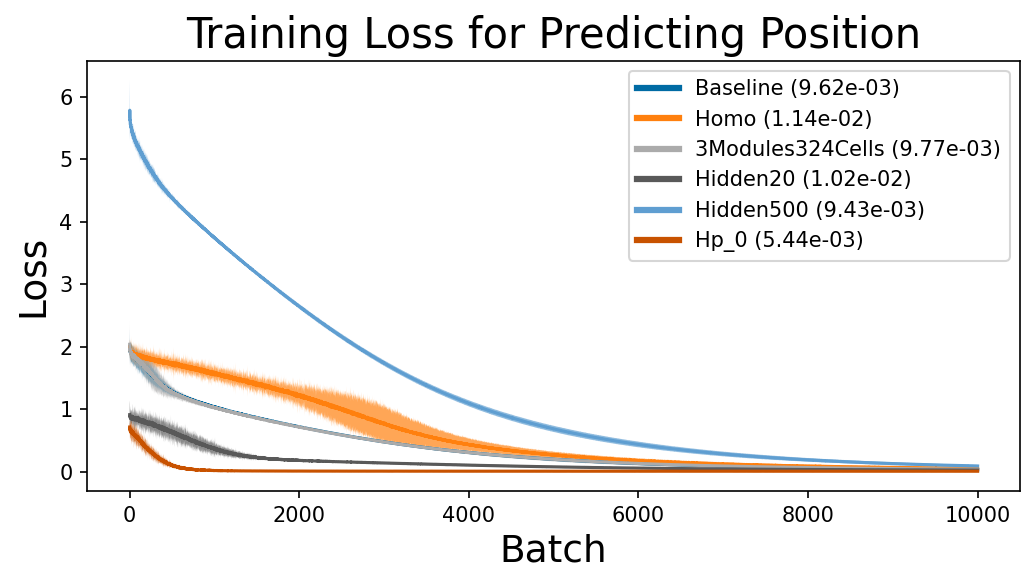

In [3]:
convergence = np.asarray(losses_pos)[:,-5000:].mean(-1)
plt.figure(figsize=(7, 4), dpi=150)

for loss, std, name, c in zip(losses_pos, np.asarray(losses_pos_std)*5, names, convergence):
    plt.plot(loss[:10000], label=f"{name.title()} ({c:.02e})")
    plt.fill_between(range(10000), loss[:10000] + std[:10000], loss[:10000] - std[:10000], alpha=0.7)
plt.xlabel("Batch", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.title("Training Loss for Predicting Position", fontsize=20)

leg = plt.legend()
for legobj in leg.legend_handles:
    legobj.set_linewidth(3)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'loss1.png'))
plt.show()

In [4]:
names = ['baseline', 'hidden500', 'hp_01', 'homo']

losses_pf, losses_pf_std = list(), list()
for name in names:
    mra = MultiRunAnalysis(data_path, name)
    losses = np.asarray(list(mra.get_pfs_losses().values()))
    losses_pf.append([losses[0].mean(0), losses[1:].mean((0, 1))])

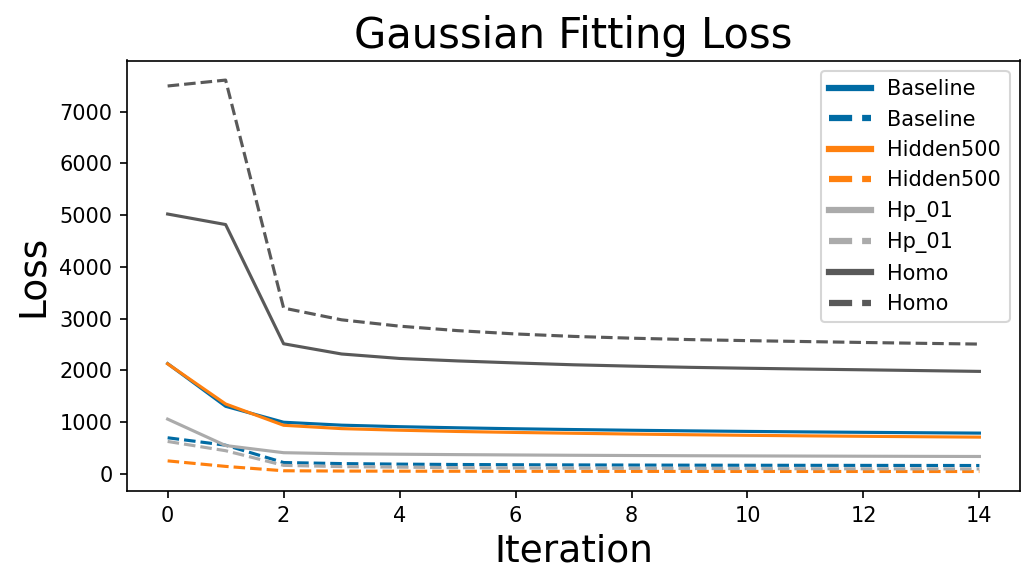

In [5]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
i = 15
plt.figure(figsize=(7, 4), dpi=150)

for (l1, l2), name, c in zip(losses_pf, names, colors):
    plt.plot(l1[:i], label=f"{name.title()}", c=c)
    plt.plot(l2[:i], linestyle='--', label=f"{name.title()}", c=c)
plt.xlabel("Iteration", fontsize=18)
plt.ylabel("Loss", fontsize=18)
plt.title("Gaussian Fitting Loss", fontsize=20)

leg = plt.legend()
for legobj in leg.legend_handles:
    legobj.set_linewidth(3)
plt.tight_layout()
plt.savefig(os.path.join(save_path, 'loss2.png'))
plt.show()